In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

rtol = 1e-06
atol = 1e-09 

In [5]:
def lloyd(sigma, b):
    s = np.random.normal(0, sigma, 1000)
    n, bins, _ = plt.hist(s, 1000, alpha=0.5, color='k')
    plt.xlabel("source values")
    plt.ylabel("density")
    
    borders = np.random.normal(0, sigma, 2**b-1)
    centers = np.zeros(2**b)
    
    borders = np.sort(borders)
    
    while(1):
        
        for j in range(2**b):
            
            prev = np.copy(centers)

            if j == 0:
                interval = s[s < borders[j]]
            elif j == 2**b - 1:
                interval = s[s > borders[j-1]]
            else:
                interval = s[np.logical_and(s > borders[j-1], s < borders[j])]
            
            sums = []
            
            for x in interval:
                sums.append(np.sum((interval - x)**2))

            #if len(interval) != 0:
            centers[j] = interval[np.argmin(sums)]
           
        if np.allclose(centers, prev, rtol, atol):
            break;
            
        
        #update borders  
        centers1 = np.copy(centers)
        centers2 = np.copy(centers)
        centers1 = np.delete(centers1, 2**b-1)
        centers2 = np.delete(centers2, 0)
        borders = (centers1 + centers2) / 2

    return borders, prev
    
    #sns.distplot(x);


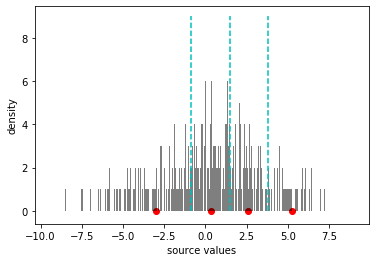

In [7]:
borders, centers = lloyd(3, 2)
plt.vlines(borders, ymin=0, ymax=9, color='c', zorder=2, linestyles='dashed')

for c in centers:
    plt.scatter(c, 0, color="r")
    
plt.show()
